In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Datafiniti_Womens_Shoes.csv')
df.head()


,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,NaN,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,"Silver,Cream Watercolor Floral",NaN,NaN,...,Overstock.com,NaN,NaN,NaN,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311,NaN
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Walmart.com,NaN,NaN,Standard,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Shoes,Shoes",Black,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903,NaN
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,Grey,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Walmart.com,NaN,NaN,Expedited,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045958,NaN


### Let's check for the missing values and place it in df_m1

In [3]:
df_m=df.isna().sum()
df_m1=df_m[df_m>0]
df_m1

asins                   9997
colors                  7369
dimension               9883
ean                     9329
manufacturer            9473
manufacturerNumber      7518
prices.availability     9566
prices.condition        9562
prices.dateAdded         777
prices.merchant         9565
prices.offer            9879
prices.returnPolicy    10000
prices.shipping         9588
upc                      360
weight                  9701
dtype: int64

### Decide the columns to drop : all the columns with more than 95% missing values

### BUT We decide to keep the prices.offer column cause NaN might mean no sales


In [4]:
df_m1 = df_m[df_m>0]/df.shape[0]
columns_to_drop=df_m1[df_m1>0.95].index
columns_to_drop=['asins', 'dimension', 'prices.availability', 'prices.condition',
       'prices.merchant', 'prices.returnPolicy',
       'prices.shipping', 'weight']

In [5]:
df=df.drop(columns_to_drop, axis=1)

### We print the rows where prices.isSale is True and prices.offer is null --> means that it's in sale but we don't have the discount value

### As it is 49 out of 10 000, we drop them

In [6]:
df.loc[df['prices.offer'].isnull()==False]
df[['prices.isSale','prices.offer']][(df['prices.isSale']==True) & (df['prices.offer'].isnull()==True)].sum()
rows_to_drop = df[['prices.isSale','prices.offer']][(df['prices.isSale']==True) & (df['prices.offer'].isnull()==True)]
df=df.drop(rows_to_drop.index)



### We replace the missing values with 0 considering the 'discount' is 0%
#### Then we drop the column prices.isSale cause it gives the same information but less precisly

In [7]:
df['prices.offer']=df['prices.offer'].fillna('0%')
df=df.drop('prices.isSale',axis=1)

### Let's check for the missing values left

In [8]:
df_m=df.isna().sum()
df_m1=df_m[df_m>0]
df_m1

colors                7369
ean                   9323
manufacturer          9457
manufacturerNumber    7518
prices.dateAdded       773
upc                    360
dtype: int64

### Now clean the primaryCategories column Shoes,Shoes becomes Shoes and now they all have the same value I drop it

In [9]:
df.primaryCategories.unique()
df.primaryCategories=df['primaryCategories'].str.replace('Shoes,Shoes','Shoes')

In [10]:
df=df.drop('primaryCategories',axis=1)

### The ean and upc represent the same thing, they are bar codes,
### We check the number of rows where the ean and the upc values are missing and it's the same as the upc missing values number so we drop the ean column

In [11]:
len(df[(df['ean'].isnull()==True) & (df['upc'].isnull()==True)])

360

In [12]:
df=df.drop('ean',axis=1)

### I also drop the men rows cause there are only 61 men shoes

In [13]:
women=0
for i in df['categories']:
    if 'Women'  in i:
        women+=1
women

9951

In [14]:
import re

df.categories.apply(lambda x: str(re.search(r'\b[M,m]en\b',x))!='None').sum()

61

In [15]:
import re
df1=df.drop(df.categories[df.categories.apply(lambda x: str(re.search(r'\b[M,m]en\b',x)))!='None'].index)

# Clean the categories column

In [16]:
all_categories_set=set([j for i in df1.categories.values.tolist() for j in i.strip(',').split(',')])
all_categories_set
good_categories_set=set([' Running & Yoga', 'Athletic', 'Athletic Shoes', 'Boat Shoes', 'Boots', "Boys' Shoes", 'Comfort',
                         'Cowboy Boots', 'Fitness', 'Flats', 'Heels', 'Home Improvement', 'Loafers', 'Low Slide Sandals',
                         'Mid-Calf Boots', 'Mules', 'Other Slip-Ons', 'Oxfords', 'Pumps', 'Rampage', 'Sandals',
                         'Sandals & Flip Flops', 'Slip-ons', 'Slippers', 'Sneakers', 'Sporting Goods', "Women's Athletic Shoes",
                         "Women's Boots", "Women's Casual Boots & Shoes", "Women's Casual Shoes", "Women's Clothing",
                         "Women's Dress Shoes", "Women's Footwear", "Women's New Balance Shoes", "Women's Red Wing Shoes",
                         "Women's Road Running Shoes", "Women's Running Shoes", "Women's Sandals", "Women's Shoes",
                         "Women's Slippers", "Women's Trail Running Shoes", "Women's Winter Boots",
                         "Women's Work & Safety Shoes", 'Womens Casual Shoes', 'Womens Comfort', 'Womens Comfort Boots & Booties',
                         'Womens Oxford & Loafers', 'Womens Oxfords', 'Womens Sandals & Flip Flops','Womens Sport Sandals',
                         'Work Safety Clothing and Equipment'])
bad_categories_set=all_categories_set-good_categories_set
bad_categories_set=set([' Shoes & Accessories','2 Lips Too','A2 by Aerosoles','ASICS',"All Women's Shoes",'All Womens Shoes',
                        'Andrew Geller','Apt. 9','Barrow','Betula by Birkenstock',"Candie's",'Clarks','Clogs','Clothing',
                        'Corkys','Croft','Dolce by Mojo Moxy',"Dr. Scholl's",'Eastland','Easy Street','FILA','Fergalicious',
                        'Forever Collectibles','Henry Ferrera','Herstar','Jennifer Lopez','Journee Collection','K-Swiss','Keds',
                        'Kisses by 2 Lips Too','Koolaburra by UGG','LC Lauren Conrad','Laredo','LifeStride','Lugz','MUK LUKS',
                        'NYLA','NaturalSoul by naturalizer','New Balance','Nike','Olivia Miller','PUMA','Qupid','REEF',
                        'Rocky 4EurSole','Ryka','SONOMA Goods for Life','Seven7','Shoes','Shop by Clothing Type',
                        'Simply Vera Vera Wang','Skechers','Soft Style by Hush Puppies','Spring Step',
                        'Style Charles by Charles David','Under Armour','Unionbay','Vans',"Women's",'Womens','Women',
                        'Womens Shoes','adidas','madden NYC','sugar'])
df2=df1.copy()
for i in bad_categories_set :
    df2['categories']=df2['categories'].str.replace(i,'')


In [17]:
df2['categories']=df2['categories'].str.replace("  ",' ')

In [18]:
df2['categories']=df2['categories'].str.replace(" ,",'')

In [19]:
df2['categories']=df2['categories'].str.replace("'s ",'')

In [20]:
df2['categories']=df2['categories'].str.replace("'s",'')

In [21]:
df2['categories']=df2['categories'].str.replace(" &",' ')

In [22]:
df2['categories']=df2['categories'].str.replace("All",'')

In [23]:
df2['categories']=df2['categories'].str.replace("Boys'",'Boyish')

In [24]:
df2['categories']=df2['categories'].str.replace("BoyishBoots",'Boyish,Boots')

In [25]:
df2['categories']=df2['categories'].str.replace("'",'')

In [26]:
df2['categories']=df2['categories'].str.replace("Casual Boots Casual ",'Casual,Boots')

In [27]:
df2['categories']=df2['categories'].str.replace("CasualCasual",'Casual')

In [28]:
df2['categories']=df2['categories'].str.replace("Casual Casual",'Casual')

In [29]:
df2['categories']=df2['categories'].str.replace("Casual Boots CasualFootwear",'Casual,Boots')

In [30]:
df2['categories']=df2['categories'].str.replace("CasualSneakersCasual",'Casual,Sneakers')

In [31]:
df2['categories']=df2['categories'].str.replace("AthleticSneakers",'Athletic,Sneakers')

In [32]:
df2['categories']=df2['categories'].str.replace("ComfortComfort Boots Booties",'Comfort,Boots')

In [33]:
df2['categories']=df2['categories'].str.replace("Red Wing",'')

In [34]:
df2['categories']=df2['categories'].str.replace("s Casuals",'Casual')

In [35]:
df2['categories']=df2['categories'].str.replace("s Casual",'Casual')

In [36]:
df2['categories']=df2['categories'].str.replace(" Casual Athletic ",'Casual,Athletic')

In [37]:
df2['categories']=df2['categories'].str.replace(" Casual Athletic ",'Casual,Athletic')

In [38]:
df2['categories']=df2['categories'].str.replace(" Casual Boots  Casual ",'Casual,Boots')

In [39]:
df2['categories']=df2['categories'].str.replace("Casual Boots  Casual Footwear",'Casual,Boots')

In [40]:
df2['categories']=df2['categories'].str.replace("CasualCasual",'Casual')

In [41]:
df2['categories']=df2['categories'].str.replace("Athletics",'Athletic')

In [42]:
df2['categories']=df2['categories'].str.replace(" Casual Boots  Casual ",'Casual,Boots')

In [43]:
df2['categories']=df2['categories'].str.replace(" Casual sAthletic ",'Casual,Athletic')

In [44]:
df2['categories']=df2['categories'].str.replace("ss Sandals  Flip Flops",'Sandals')

In [45]:
df2['categories']=df2['categories'].str.replace("Sandals  Flip Flops",'Sandals')

In [46]:
df2['categories']=df2['categories'].str.replace("Casuals",'Casual')

In [47]:
df2['categories']=df2['categories'].str.replace("sCasual",'Casual')

In [48]:
df2['categories']=df2['categories'].str.replace("ss Oxford  Loafers",'Oxford,Loafers')

In [49]:
df2['categories']=df2['categories'].str.replace("Dresss",'Dress')

In [50]:
df2['categories']=df2['categories'].str.replace("DressHome Improvement",'Dress,Home')

In [51]:
df2['categories']=df2['categories'].str.replace("Home Improvement",'Home')

In [52]:
df2['categories']=df2['categories'].str.replace("CasualSneakers",'Casual,Sneakers')

In [53]:
df2['categories']=df2['categories'].str.replace("sShop by Type",'')

In [54]:
df2['categories']=df2['categories'].str.replace("ss Comfort",'Comfort')

In [55]:
df2['categories']=df2['categories'].str.replace("DressHome",'Dress,Home')

In [56]:
df2['categories']=df2['categories'].str.replace("s Sport Sandals",'Sandals')

In [57]:
df2['categories']=df2['categories'].str.replace(",s",'')

In [58]:
df2['categories']=df2['categories'].str.replace("Running  Yoga",'Running,Yoga')

In [59]:
df2['categories']=df2['categories'].str.replace("BootHeels",'Boots,Heels')

In [60]:
df2['categories']=df2['categories'].str.replace("Accessories",'')

In [61]:
df2['categories']=df2['categories'].str.replace("Road Running Footwear",'Running')

In [62]:
df2['categories']=df2['categories'].str.replace("Comfort Boots  Booties",'Comfort,Boots')

In [63]:
df2['categories']=df2['categories'].str.replace("CasualAthletic",'Casual,Athletic')

In [64]:
df2['categories']=df2['categories'].str.replace("Running Road Running",'Running')

In [65]:
df2['categories']=df2['categories'].str.replace("AthleticWork  Safety",'Athletic,Safety')

In [66]:
df2['categories']=df2['categories'].str.replace("Trail RunningFootwear",'Running')

In [67]:
df2['categories']=df2['categories'].str.replace("Sporting Goods",'Athletics')

In [68]:
df2['categories']=df2['categories'].str.replace("Oxford  Loafers",'Oxford,Loafers')

In [69]:
df2['categories']=df2['categories'].str.replace("Low Slide Sandals",'Sandals')

In [70]:
df2['categories']=df2['categories'].str.replace("Work Safety and Equipment",'Safety')

In [71]:
df2['categories']=df2['categories'].str.replace("RunningTrailRunning",'Running')

In [72]:
df2['categories']=df2['categories'].str.replace("Road RunningFootwear",'Running')

In [73]:
df2['categories']=df2['categories'].str.replace("RunningRoad Running",'Running')

In [74]:
df2['categories']=df2['categories'].str.replace("Mid-Calf Boots",'Booties')

In [75]:
df2['categories']=df2['categories'].str.replace("Winter Boots",'Boots')

In [76]:
df2['categories']=df2['categories'].str.replace("Dress Home",'Dress,Home')

In [77]:
df2['categories']=df2['categories'].str.replace("Sport Sandals",'Athletics,Sandals')

In [78]:
df2['categories']=df2['categories'].str.replace("Footwear",'')

In [79]:
df2['categories']=df2['categories'].str.replace("Athletic",'Athletics')

In [80]:
df2['categories']=df2['categories'].str.replace("Athleticss",'Athletics')

In [81]:
df2['categories']=df2['categories'].str.replace("Cowboy Boots",'Cowboy,Boots')

In [82]:
df2['categories']=df2['categories'].str.replace("Comfort Comfort",'Comfort')

In [83]:
df2['categories']=df2['categories'].str.replace("Kisses by",'')

In [84]:
df2['categories']=df2['categories'].str.replace("Loafers Oxfords",'Loafers,Oxfords')

In [85]:
df2['categories']=df2['categories'].str.replace("Shop by Type",'')

In [86]:
df2['categories']=df2['categories'].str.replace(" s,",',')

In [87]:
df2['categories']=df2['categories'].str.replace(" ",'')

In [88]:
df2['categories']=df2['categories'].str.replace("AthleticsWorkSafety",'Athletics,Safety')

In [89]:
df2['categories']=df2['categories'].str.replace("TrailRunning",'Running')

In [90]:
df2['categories']=df2['categories'].str.replace("Fitness",'Athletics')
df2['categories']=df2['categories'].str.replace("Dress",'Dressy')
df2['categories']=df2['categories'].str.replace("Oxfords",'Oxford')
df2['categories']=df2['categories'].str.replace("Oxford",'Oxfords')

In [91]:
df2['categories']=df2['categories'].str.replace("Dressyy",'Dressy')

In [92]:
df2['categories']=df2['categories'].str.replace("s,",',')

In [93]:
df2['categories']=df2['categories'].str.replace("Athletics",'Athletic')
df2['categories']=df2['categories'].str.replace("Athletic",'Athletics')

In [94]:
df2['categories']=df2['categories'].str.replace("Oxfords",'Oxford')
df2['categories']=df2['categories'].str.replace("Oxford",'Oxfords')

In [95]:
df2['categories']=df2['categories'].str.replace("Boots",'Boot')
df2['categories']=df2['categories'].str.replace("Boot",'Boots')

In [96]:
df2['categories']=df2['categories'].str.replace("Flats",'Flat')
df2['categories']=df2['categories'].str.replace("Flat",'Flats')

In [97]:
df2['categories']=df2['categories'].str.replace("Slippers",'Slipper')
df2['categories']=df2['categories'].str.replace("Slipper",'Slippers')

In [98]:
df2['categories']=df2['categories'].str.replace("Sandals",'Sandal')
df2['categories']=df2['categories'].str.replace("Sandal",'Sandals')

In [99]:
df2['categories']=df2['categories'].str.replace("Heels",'Heel')
df2['categories']=df2['categories'].str.replace("Heel",'Heels')

In [100]:
df2['categories']=df2['categories'].str.replace("Bootsies",'Booties')


In [101]:
df2['categories']=df2['categories'].str.replace("Loafer",'Loafers')

In [102]:
df2['categories']=df2['categories'].str.replace("Mule",'Mules')

In [103]:
df2['categories']=df2['categories'].str.replace("Pump",'Pumps')

In [104]:
df2['categories']=df2['categories'].str.replace("Sneaker",'Sneakers')

In [105]:
all_categories_set=set([j for i in df2.categories.values.tolist() for j in i.strip(',').split(',')])
print(all_categories_set)

{'', 'Sneakers', 'Comfort', 'Boat', 'Home', 'Boyish', 'Oxfords', 'Running', 'Boots', 'RunningRunning', 'Casual', 'Flats', 'Mules', 'Rampage', 'Loafers', 'Cowboy', 'Slippers', 'Pumps', 'Safety', 'Heels', 'Slip-on', 'Dressy', 'Yoga', 'Booties', 'Athletics', 'Sandals'}


In [106]:
df3=df2.copy()


aaaaaa=df2['categories'].sort_values().str.split(',',expand=True)
# aaaaaa.apply(lambda x:str(x[0]).replace(str(x[1]),''),axis=1)

# No Missing Values in column 'Brand'

In [107]:
df2['brand']=df2['brand'].str.title()
df2['brand'][df2['brand'].isna()].sum()

0

In [108]:
# df2.sort_values('categories', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

In [109]:
# df2['categories'].sort_values().str.split(',',expand=True)

# Deleting the 'UPC' missing values rows cause impossible to predict and represents a few part of the data

In [110]:
rows_to_drop2 = df2[['upc']][df2['upc'].isnull()==True]
rows_to_drop.shape
df2=df2.drop(rows_to_drop2.index)

In [111]:
df2.head()

,id,dateAdded,dateUpdated,brand,categories,colors,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,",,Heels,Sandals","Silver,Cream Watercolor Floral",https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,",,Casual",Grey,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,",,Slippers",Black,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,",,Casual,Slippers,Slippers,,","Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,",,Casual,Slippers,Slippers,,","Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275


# remove the ',' in the column categories

In [112]:

def remove(a):
    for i in range(len(a)) :
        while str('') in a[i]:
            a[i].remove('')
        a[i]=list(set(a[i]))
    return a

In [113]:
df3=df2.copy()

df3.categories=remove(df3['categories'].sort_values().str.split(',').tolist())

In [114]:
# print(df3['categories'].sort_values().str.split(',').tolist())

# remove the brackets

In [115]:
df3.categories=df3.categories.astype('str')


In [116]:
df3.head()

,id,dateAdded,dateUpdated,brand,categories,colors,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,[],"Silver,Cream Watercolor Floral",https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,[],Grey,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,[],Black,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,[],"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,[],"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275


In [117]:
df3['categories'].unique()
cat_lst1 =['[]', "['Sneakers', 'Athletics']",
            "['Casual', 'Sneakers', 'Athletics']", "['Cowboy', 'Boots']",
            "['Mules']", "['Casual', 'Mules']", "['Sandals']",
            "['Sneakers', 'Athletics', 'Yoga', 'Running']",
            "['Sneakers', 'Athletics', 'Slip-on']", "['Boat']", "['Boots']",
            "['Heels', 'Boots']", "['Boots', 'Booties']",
            "['Boyish', 'Boots']", "['Casual']", "['Casual', 'Boat']",
            "['Casual', 'Slippers']", "['Comfort', 'Boots']", "['Dressy']",
            "['Safety', 'Home', 'Dressy']", "['Oxfords', 'Dressy']",
            "['Heels', 'Pumps', 'Dressy']", "['Sandals', 'Dressy']",
            "['Flats']", "['Heels', 'Sandals']", "['Safety', 'Home']",
            "['Loafers']", "['Oxfords']", "['Oxfords', 'Loafers']",
            "['Heels', 'Pumps']", "['Heels', 'Boots', 'Pumps']",
            "['Heels', 'Comfort', 'Pumps', 'Flats']",
            "['Heels', 'Rampage', 'Pumps']", "['Sandals', 'Boots']",
            "['Athletics', 'Sandals']", "['Slippers']", "['Rampage']",
            "['Sneakers', 'Athletics', 'Safety', 'Home']"]

cat_lst2 =['', "Sneakers, Athletics",
            "Casual, Sneakers, Athletics", "Cowboy, Boots",
            "Mules", "Casual, Mules", "Sandals","Sneakers, Athletics, Yoga, Running",
            "Sneakers, Athletics, Slip-on", "Boat", "Boots",
            "Heels, Boots", "Boots, Booties",
            "Boyish, Boots", "Casual", "Casual, Boat",
            "Casual, Slippers", "Comfort, Boots", "Dressy",
            "Safety, Home, Dressy", "Oxfords, Dressy",
            "Heels, Pumps, Dressy", "Sandals, Dressy",
            "Flats", "Heels, Sandals", "Safety, Home",
            "Loafers", "Oxfords", "Oxfords, Loafers",
            "Heels, Pumps", "Heels, Boots, Pumps",
            "Heels, Comfort, Pumps, Flats",
            "Heels, Rampage, Pumps", "Sandals, Boots",
            "Athletics, Sandals", "Slippers", "Rampage",
            "Sneakers, Athletics, Safety, Home"]

df4=df3.copy()
for i in range(len(cat_lst1)) :
    df4['categories']=df4['categories'].replace(str(cat_lst1[i]),str(cat_lst2[i]))
    
df4.head()

,id,dateAdded,dateUpdated,brand,categories,colors,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,"Silver,Cream Watercolor Floral",https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,Grey,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,Black,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275


# Colors

In [118]:
df5=df4.copy()
df5.colors.isna().sum()

7334

In [119]:
df5=df4.copy()
df5['prices.color'].isna().sum()

0

In [120]:
df5[['prices.color','colors']][(df5['colors'].isna()==False)]

df5.head()

,id,dateAdded,dateUpdated,brand,categories,colors,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,"Silver,Cream Watercolor Floral",https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,Grey,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,Black,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,"Light Blue,Brown,Navy,Purple,Burgundy,Black,Na...",https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275


In [121]:
df5=df5.drop('colors',axis=1)


In [122]:
df5.head()

,id,dateAdded,dateUpdated,brand,categories,imageURLs,keys,manufacturer,manufacturerNumber,name,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,https://i5.walmartimages.com/asr/861ca6cf-fa55...,"naturalizer/47147sc022,017136472311,womensnatu...",NaN,47147SC022,Naturalizer Danya Women N/S Open Toe Synthetic...,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,https://i5.walmartimages.com/asr/421de5d5-3a74...,"mukluks/00173650206,033977045743,muklukswomens...",Muk Luks,0017365020-6,MUK LUKS Womens Jane Suede Moccasin,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,https://i5.walmartimages.com/asr/950d38a5-0113...,"033977045903,muklukswomensdawnsuedescuffslippe...",Muk Luks,0017366001-6,MUK LUKS Womens Dawn Suede Scuff Slipper,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,https://i5.walmartimages.com/asr/53c04329-c04e...,"womensclogwithfurlining/556122745,033977172555...",NaN,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275


In [123]:
df5=df5.drop('keys',axis=1)


In [124]:
df5[['brand','manufacturer']][(df5['manufacturer'].isna()==False) & (df5['brand'] != df5['manufacturer']) ].head()


,brand,manufacturer
18,Muk Luks,Reliable of Milwaukee
142,Victoria K.,S-1944-red-6
165,Ellie Shoes,ELLIE SHOES
169,Brinley Co.,Brinley Co
173,Brinley Co.,Brinley Co


In [125]:
df5['manufacturer']=df5['manufacturer'].str.title()


In [126]:
df5[['brand','manufacturer']][(df5['manufacturer'].isna()==False) & (df5['brand'] != df5['manufacturer']) ]
df5.head()

,id,dateAdded,dateUpdated,brand,categories,imageURLs,manufacturer,manufacturerNumber,name,prices.amountMax,...,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,https://i5.walmartimages.com/asr/861ca6cf-fa55...,NaN,47147SC022,Naturalizer Danya Women N/S Open Toe Synthetic...,55.99,...,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,https://i5.walmartimages.com/asr/421de5d5-3a74...,Muk Luks,0017365020-6,MUK LUKS Womens Jane Suede Moccasin,35.25,...,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,https://i5.walmartimages.com/asr/950d38a5-0113...,Muk Luks,0017366001-6,MUK LUKS Womens Dawn Suede Scuff Slipper,24.75,...,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,https://i5.walmartimages.com/asr/53c04329-c04e...,NaN,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,24.00,...,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,https://i5.walmartimages.com/asr/53c04329-c04e...,NaN,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,24.00,...,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275


In [127]:
df5['manufacturer']=df5['manufacturer'].str.replace("Brinley Co.",'Brinley Co')
df5['manufacturer']=df5['manufacturer'].str.replace("Brinley Co",'Brinley Co.')
df5['manufacturer']=df5['manufacturer'].str.replace("Eastland Shoe",'Eastland')
df5['manufacturer']=df5['manufacturer'].str.replace("Dr. Scholl'S",'Dr. Scholls')
df5['manufacturer']=df5['manufacturer'].str.replace("Spring Footwear",'Spring Step')

df5[['brand','manufacturer']][(df5['manufacturer'].isna()==False) & (df5['brand'] != df5['manufacturer']) ]

,brand,manufacturer
18,Muk Luks,Reliable Of Milwaukee
142,Victoria K.,S-1944-Red-6
5803,Journee Collection,Brinley Co.
5804,Journee Collection,Brinley Co.
5805,Journee Collection,Brinley Co.
5806,Journee Collection,Brinley Co.
5807,Journee Collection,Brinley Co.
5808,Journee Collection,Brinley Co.
5809,Journee Collection,Brinley Co.
5810,Journee Collection,Brinley Co.


In [128]:
df5[['brand','manufacturer']][(df5['manufacturer']=='Brinley Co.') & (df5['brand'] == 'Journee Collection') ]

,brand,manufacturer
5803,Journee Collection,Brinley Co.
5804,Journee Collection,Brinley Co.
5805,Journee Collection,Brinley Co.
5806,Journee Collection,Brinley Co.
5807,Journee Collection,Brinley Co.
5808,Journee Collection,Brinley Co.
5809,Journee Collection,Brinley Co.
5810,Journee Collection,Brinley Co.
5811,Journee Collection,Brinley Co.
5812,Journee Collection,Brinley Co.


In [129]:
df5[['brand','manufacturer']][(df5['brand'] == 'Journee Collection') & (df5['manufacturer'].isna() == False)]

,brand,manufacturer
5803,Journee Collection,Brinley Co.
5804,Journee Collection,Brinley Co.
5805,Journee Collection,Brinley Co.
5806,Journee Collection,Brinley Co.
5807,Journee Collection,Brinley Co.
5808,Journee Collection,Brinley Co.
5809,Journee Collection,Brinley Co.
5810,Journee Collection,Brinley Co.
5811,Journee Collection,Brinley Co.
5812,Journee Collection,Brinley Co.


In [130]:
df5[['manufacturer']][(df5['manufacturer'].isna() == True)].index

Int64Index([   0,    6,    7,   20,   22,   25,   27,   28,   29,   30,
            ...
            9630, 9631, 9632, 9633, 9634, 9635, 9636, 9637, 9638, 9639],
           dtype='int64', length=9041)

In [131]:
df6=df5.copy()

In [132]:
df6=df6.drop('manufacturer', axis=1)

In [133]:
df6=df6.drop('imageURLs', axis=1)

In [134]:
df6.head()

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,Naturalizer,,47147SC022,Naturalizer Danya Women N/S Open Toe Synthetic...,55.99,55.99,UWomens M Regular,USD,2017-03-28T11:40:25Z,"2017-03-25T09:19:24.819Z,2017-03-25T09:19:19.600Z",0%,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,Muk Luks,,0017365020-6,MUK LUKS Womens Jane Suede Moccasin,35.25,35.25,Grey,USD,2017-12-06T05:02:42Z,"2017-11-10T15:11:00.000Z,2017-11-18T08:00:00.000Z",0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,Muk Luks,,0017366001-6,MUK LUKS Womens Dawn Suede Scuff Slipper,24.75,24.75,Black,USD,2018-01-04T11:52:35Z,2017-12-07T16:37:00.000Z,0%,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903
6,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,24.00,12.79,Purple,USD,NaN,"2017-11-02T09:00:00Z,2017-11-03T12:00:00Z,2017...",0%,SMALL,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275
7,AVpjGKXyLJeJML43r8BH,2017-01-17T19:09:21Z,2018-10-15T15:50:13Z,Muk Luks,,0015589605-S,Women's MUK LUKS¬Æ Faux Suede Clogs,24.00,12.79,Brown,USD,NaN,"2017-11-02T09:00:00Z,2017-11-01T10:00:00Z",0%,MEDIUM,https://www.kohls.com/product/prd-1780800/wome...,"S 5-6,SMALL,M 7-8,MEDIUM,LARGE,L 9-10,L 8-9",https://www.walmart.com/ip/Women-s-Clog-with-F...,033977098275


In [135]:
df6.categories[df6['categories']==''].shape

(13,)

In [136]:
rows_to_drop3=df6.categories[df6['categories']=='']
rows_to_drop3

0     
2     
3     
6     
7     
18    
20    
21    
22    
25    
27    
28    
29    
Name: categories, dtype: object

In [137]:
df6=df6.drop(rows_to_drop3.index)

In [138]:
df6['categories'].unique()

array(['Sandals', 'Sneakers, Athletics', 'Casual, Sneakers, Athletics',
       'Cowboy, Boots', 'Mules', 'Casual, Mules',
       'Sneakers, Athletics, Yoga, Running',
       "['Slip-on', 'Sneakers', 'Athletics']", 'Boat', 'Boots',
       'Heels, Boots', "['Booties', 'Boots']", "['Boots', 'Boyish']",
       'Casual', "['Boat', 'Casual']", 'Casual, Slippers',
       "['Boots', 'Comfort']", 'Dressy', "['Dressy', 'Home', 'Safety']",
       "['Dressy', 'Oxfords']", "['Dressy', 'Heels', 'Pumps']",
       "['Dressy', 'Sandals']", 'Flats', 'Heels, Sandals',
       "['Home', 'Safety']", 'Loafers', 'Oxfords', 'Oxfords, Loafers',
       'Heels, Pumps', 'Heels, Boots, Pumps',
       "['Comfort', 'Flats', 'Heels', 'Pumps']", 'Heels, Rampage, Pumps',
       "['Boots', 'Sandals']", 'Athletics, Sandals', 'Slippers',
       'Rampage', "['Sneakers', 'Home', 'Athletics', 'Safety']"],
      dtype=object)

In [139]:
df6['categories']=df6['categories'].str.replace("Sneakers, Athletics",'Athletics')

# flats & heels can's be in the same categories

In [140]:
df6['categories'][df6['categories']=='Heels, Comfort, Pumps, Flats'].index

Int64Index([], dtype='int64')

In [141]:
df6['categories'][df6['categories']=='Heels, Comfort, Pumps, Flats'].shape

(0,)

In [142]:
df6['sourceURLs'].loc[[7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692,
            7693, 7694, 7695, 7696, 7697, 7698, 7699, 7700, 7701, 7702, 7703,
            7704, 7705, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7714,
            7715, 7716, 7717, 7718, 7719, 7720, 7721, 7722, 7723, 7724, 7725,
            7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736,
            7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7745, 7746, 7747,
            7748, 7749, 7750, 7751, 7752, 7753, 7754, 7755, 7756, 7757, 7758,
            7759, 7760, 7761, 7762, 7763]].unique()

array(['https://www.kohls.com/product/prd-2934158/journee-collection-shilo-womens-wrap-shoes.jsp',
       'https://www.kohls.com/product/prd-2948334/journee-collection-marlee-womens-pointed-flats.jsp',
       'https://www.kohls.com/product/prd-2934104/journee-collection-haven-womens-high-heels.jsp',
       'https://www.kohls.com/product/prd-2934099/journee-collection-gemini-womens-high-heel-sandals.jsp'],
      dtype=object)

### The first link refers to a heel pair of shoes

In [143]:
replace1=df6['sourceURLs'][df6['sourceURLs']=='https://www.kohls.com/product/prd-2934158/journee-collection-shilo-womens-wrap-shoes.jsp'].index

replace1

Int64Index([7667, 7668, 7669, 7670, 7671, 7672, 7673, 7674, 7675, 7676, 7677,
            7678, 7679, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688,
            7689, 7690, 7691, 7692, 7693, 7694, 7695, 7696, 7697, 7698, 7699,
            7700, 7701, 7702, 7703, 7704, 7705, 7706, 7707, 7708, 7709, 7710,
            7711, 7712, 7713, 7714, 7715, 7716, 7717, 7718, 7719, 7720, 7721,
            7722, 7723],
           dtype='int64')

In [144]:
df7=df6.copy()

In [145]:
df7.at[7667,'categories']='Heels, Comfort'

In [146]:
df7.loc[7667]

id                                                 AV-9j2PqKZqtpbFMTHwP
dateAdded                                          2017-11-15T02:33:40Z
dateUpdated                                        2018-01-28T12:08:52Z
brand                                                Journee Collection
categories                                               Heels, Comfort
manufacturerNumber                                                  NaN
name                        Journee Collection Shilo Women's Wrap Shoes
prices.amountMax                                                  89.99
prices.amountMin                                                  37.49
prices.color                                                      Taupe
prices.currency                                                     USD
prices.dateAdded                                   2017-12-06T11:43:45Z
prices.dateSeen       2017-12-02T13:52:00.000Z,2017-11-30T13:48:00.000Z
prices.offer                                                    

In [147]:
for i in replace1 :
    df7.at[i,'categories']='Heels, Comfort'
df7.loc[replace1].head()

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
7667,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,37.49,Taupe,USD,2017-12-06T11:43:45Z,"2017-12-02T13:52:00.000Z,2017-11-30T13:48:00.000Z",0%,10,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7668,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,59.49,Brown,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-18T12:59:00.0...",0%,12,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7669,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,52.49,Brown,USD,2017-12-31T08:00:35Z,"2017-12-10T07:40:00.000Z,2017-12-04T13:42:00.0...",0%,11,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7670,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,59.49,Brown,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-18T12:59:00.0...",0%,7,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."
7671,AV-9j2PqKZqtpbFMTHwP,2017-11-15T02:33:40Z,2018-01-28T12:08:52Z,Journee Collection,"Heels, Comfort",NaN,Journee Collection Shilo Women's Wrap Shoes,89.99,55.99,Black,USD,2017-12-02T03:32:39Z,"2017-11-19T15:12:00.000Z,2017-11-05T15:43:00.0...",0%,8.5,https://www.kohls.com/product/prd-2934158/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934158/jour...,"870251663350,870251663459,870251663251,8702516..."


## Second link, flat shoes

In [148]:
replace2=df6['sourceURLs'][df6['sourceURLs']=='https://www.kohls.com/product/prd-2948334/journee-collection-marlee-womens-pointed-flats.jsp'].index

replace2

Int64Index([7724, 7725, 7726, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734,
            7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743],
           dtype='int64')

In [149]:
for i in replace2 :
    df7.at[i,'categories']='Flat'
df7.loc[replace2].head()

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
7724,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,39.99,Blue,USD,2017-12-19T13:50:01Z,"2017-11-28T17:01:00.000Z,2017-11-29T15:37:00.0...",0%,6.5,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7725,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,59.99,Taupe,USD,2018-02-01T07:35:44Z,"2018-01-16T11:30:00.000Z,2018-01-09T14:24:00.0...",0%,8,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7726,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,59.99,Blue,USD,2018-02-01T07:35:44Z,"2018-01-16T11:30:00.000Z,2018-01-09T14:24:00.0...",0%,9,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7727,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,42.49,Taupe,USD,2018-01-02T17:29:14Z,"2017-12-19T11:52:00.000Z,2017-12-24T12:02:00.0...",0%,6.5,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."
7728,AV_cO7IHYSSHbkXwq03F,2017-11-20T21:09:48Z,2018-02-01T07:35:44Z,Journee Collection,Flat,NaN,Journee Collection Marlee Women's Pointed Flats,59.99,42.49,Gray,USD,2018-01-02T17:29:14Z,"2017-12-19T11:52:00.000Z,2017-12-24T12:02:00.0...",0%,6.5,https://www.kohls.com/product/prd-2948334/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2948334/jour...,"870251663954,870251663657,870251663756,8702516..."


## Third link, Heels

In [150]:
replace3=df7['sourceURLs'][df7['sourceURLs']=='https://www.kohls.com/product/prd-2934104/journee-collection-haven-womens-high-heels.jsp'].index

replace3

Int64Index([7744, 7745, 7746, 7747, 7748, 7749, 7750, 7751, 7752, 7753], dtype='int64')

In [151]:
for i in replace3 :
    df7.at[i,'categories']='Heels'
df7.loc[replace3].head(10)

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
7744,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,64.99,Gray,USD,2017-12-07T19:09:49Z,"2017-11-25T10:18:00.000Z,2017-11-27T09:20:00.0...",0%,8,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7745,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,55.24,Taupe,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-24T14:40:00.0...",0%,11,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7746,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,79.99,Black,USD,2018-01-10T19:52:42Z,"2018-01-09T14:05:00.000Z,2018-01-05T10:43:00.0...",0%,6.5,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7747,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,48.74,Gray,USD,2017-12-31T04:45:16Z,"2017-12-04T13:42:00.000Z,2017-12-09T22:10:00.0...",0%,9,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7748,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,64.99,Blue,USD,2017-12-07T19:09:49Z,"2017-11-25T10:18:00.000Z,2017-11-27T09:20:00.0...",0%,10,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7749,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,51.99,Black,USD,2017-12-19T13:51:15Z,"2017-11-28T19:06:00.000Z,2017-11-29T16:07:00.0...",0%,6,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7750,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,55.24,Gray,USD,2018-01-02T17:27:33Z,"2017-12-19T10:17:00.000Z,2017-12-20T09:23:00.0...",0%,9,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7751,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,51.99,Taupe,USD,2017-12-19T13:51:15Z,"2017-11-28T19:06:00.000Z,2017-11-29T16:07:00.0...",0%,9,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"870251664050,870251664159,870251664258,8702516..."
7752,AV-9htGEYSSHbkXwpyIj,2017-11-15T02:33:40Z,2018-01-10T19:52:42Z,Journee Collection,Heels,NaN,Journee Collection Haven Women's High Heels,79.99,48.74,Taupe,USD,2017-12-31T04:45:16Z,"2017-12-04T13:42:00.000Z,2017-12-09T22:10:00.0...",0%,12,https://www.kohls.com/product/prd-2934104/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934104/jour...,"8702516

In [152]:
# Fourth link, heels

In [153]:
replace4=df7['sourceURLs'][df7['sourceURLs']=='https://www.kohls.com/product/prd-2934099/journee-collection-gemini-womens-high-heel-sandals.jsp'].index

replace4

Int64Index([7754, 7755, 7756, 7757, 7758, 7759, 7760, 7761, 7762, 7763, 7764,
            7765, 7766, 7767, 7768, 7769, 7770, 7771, 7772],
           dtype='int64')

In [154]:
for i in replace4 :
    df7.at[i,'categories']='Heels'
df7.loc[replace4].head()

,id,dateAdded,dateUpdated,brand,categories,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
7754,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,51.99,Red,USD,2017-12-19T13:51:15Z,"2017-11-28T19:06:00.000Z,2017-11-29T16:07:00.0...",0%,9,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7755,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,64.99,Nude,USD,2017-12-07T19:09:50Z,"2017-11-25T10:23:00.000Z,2017-11-27T09:20:00.0...",0%,10,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7756,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,79.99,Black,USD,2018-01-21T05:29:21Z,"2018-01-18T09:55:00.000Z,2018-01-09T14:05:00.0...",0%,11,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7757,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,48.74,Nude,USD,2017-12-31T08:00:35Z,"2017-12-10T07:41:00.000Z,2017-12-04T13:42:00.0...",0%,11,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."
7758,AV-9iqiFKZqtpbFMTHt_,2017-11-15T02:33:40Z,2018-01-21T05:29:21Z,Journee Collection,Heels,NaN,Journee Collection Gemini Women's High Heel Sa...,79.99,48.74,Black,USD,2017-12-31T08:00:35Z,"2017-12-10T07:41:00.000Z,2017-12-04T13:42:00.0...",0%,6.5,https://www.kohls.com/product/prd-2934099/jour...,"6,6.5,7,7.5,8,8.5,9,10,11,12",https://www.kohls.com/product/prd-2934099/jour...,"870251664654,870251664555,870251664753,8702516..."


# prices.sourceURLs / sourceURLs

In [155]:
df7[['prices.sourceURLs','sourceURLs']][df7['prices.sourceURLs']!=df7['sourceURLs']].shape

(3218, 2)

# Missing Values

In [156]:
df7_m=df7.isna().sum()
df7_m1=df7_m[df7_m>0]
df7_m1

manufacturerNumber    7475
prices.dateAdded       407
dtype: int64

In [157]:
df7=df7.drop('manufacturerNumber',axis=1)

In [158]:
df7.head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.currency,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
30,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,44.99,Taupe,USD,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
31,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,USD,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
32,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,USD,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
33,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
34,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,USD,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000


# Currency

In [159]:
df7['prices.currency'].unique()

array(['USD'], dtype=object)

In [160]:
df7=df7.drop('prices.currency',axis=1)

In [161]:
df7.head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
30,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,44.99,Taupe,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
31,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
32,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
33,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
34,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000


# dateAdded

In [162]:
df7[df7['dateAdded']!=df7['prices.dateAdded']].shape

(9473, 17)

In [163]:
df7.shape

(9517, 17)

In [164]:
df7[df7['prices.dateAdded'].isna()].shape

(407, 17)

In [165]:
df7[(df7['dateAdded']==df7['prices.dateAdded'])&((df7['prices.dateAdded'].isna())==False)].shape

(44, 17)

In [166]:
df7.isna().sum()

id                     0
dateAdded              0
dateUpdated            0
brand                  0
categories             0
name                   0
prices.amountMax       0
prices.amountMin       0
prices.color           0
prices.dateAdded     407
prices.dateSeen        0
prices.offer           0
prices.size            0
prices.sourceURLs      0
sizes                  0
sourceURLs             0
upc                    0
dtype: int64

In [167]:
df7[['dateAdded','prices.dateAdded']][df7['dateAdded']!=df7['prices.dateAdded']].head()

,dateAdded,prices.dateAdded
30,2017-11-05T03:20:19Z,NaN
31,2017-11-05T03:20:19Z,NaN
32,2017-11-05T03:20:19Z,NaN
33,2017-11-16T10:51:47Z,NaN
34,2017-11-16T10:51:47Z,NaN


In [168]:
df7[['dateAdded','prices.dateAdded','prices.dateSeen']][df7['prices.dateSeen']!=df7['prices.dateAdded']].head()

,dateAdded,prices.dateAdded,prices.dateSeen
30,2017-11-05T03:20:19Z,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017..."
31,2017-11-05T03:20:19Z,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018..."
32,2017-11-05T03:20:19Z,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018..."
33,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."
34,2017-11-16T10:51:47Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017..."


In [169]:
df7.head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc
30,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,44.99,Taupe,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
31,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
32,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000
33,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000
34,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000


In [170]:
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '8.5 WIDE',
       '9 WIDE', '7 WIDE', '6', '6 WIDE', '7.5 WIDE', '5', '11',
       '9.5 WIDE', '8 WIDE', '7.5', '11 WIDE', '8 MED', '5.5 MED',
       '5 MED', '9 MED', '6.5 MED', '6 MED', '7.5 MED', '9.5 MED', 'S',
       '8.5 MED', '7 MED', '12', '12 MED', '10 WIDE', '6.5 WIDE',
       '10 MED', '11 MED', 'LARGE', 'SMALL', 'MEDIUM', '10.5 WIDE',
       '10.5', '12 WIDE', '5.5 WIDE', '5 WIDE', '10.5 MED', '40', '39',
       '42', '41', '38 WIDE', '37', '36 WIDE', '41 WIDE', '36', '40 WIDE',
       '38', '35', '11.5 WIDE', '11.5'], dtype=object)

In [171]:
df7['Fitting'] = df7.apply(lambda _: '', axis=1)


In [172]:
Large=df7[(df7['prices.size']=='LARGE')].index

In [173]:
for i in Large:
    df7.at[i,'prices.size']='9.5'
df7.loc[Large].head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
538,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,12.79,Multi Unicorn,2017-11-30T16:19:48Z,"2017-11-05T08:37:00.000Z,2017-11-02T08:11:00.0...",0%,9.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",
542,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,8.16,Gray Bunny,2018-01-21T03:17:03Z,2018-01-15T13:36:00.000Z,0%,9.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",


In [174]:
Wide=df7[df7['prices.size'].str.contains('WIDE')].index

In [175]:
for i in Wide:
    df7.at[i,'Fitting']='Wide'
df7.loc[Wide].head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
43,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,54.99,White Black,NaN,"2017-11-28T14:00:00Z,2017-11-27T11:00:00Z,2017...",0%,8.5 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
44,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,48.74,Black,NaN,"2017-11-24T08:00:00Z,2017-11-23T09:00:00Z,2017...",0%,9 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
45,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,59.99,Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,7 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
56,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,49.99,White Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,6 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
59,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,49.99,White Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,7.5 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide


In [176]:
Narrow=df7[df7['prices.color'].str.contains('N')].index

In [177]:
for i in Narrow:
    df7.at[i,'Fitting']='Narrow'
df7.loc[Wide].head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
43,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,54.99,White Black,NaN,"2017-11-28T14:00:00Z,2017-11-27T11:00:00Z,2017...",0%,8.5 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
44,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,48.74,Black,NaN,"2017-11-24T08:00:00Z,2017-11-23T09:00:00Z,2017...",0%,9 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
45,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,59.99,Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,7 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
56,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,49.99,White Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,6 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide
59,AV2cVsE7vKc47QAVpJKS,2017-08-01T05:48:37Z,2018-04-21T12:43:25Z,Skechers,Athletics,Skechers Women's Flex Appeal 2.0 - Insights - ...,64.99,49.99,White Black,NaN,"2018-01-15T10:00:00Z,2018-01-16T15:00:00Z,2018...",0%,7.5 WIDE,https://www.kohls.com/product/prd-2794520/skec...,"6 WIDE,6.5 WIDE,7 WIDE,7.5 WIDE,8 WIDE,9.5 WID...",https://www.walmart.com/ip/Skechers-Flex-Appea...,190873000000,Wide


In [178]:
df7['prices.size']=df7['prices.size'].str.replace("WIDE",'')

In [179]:
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '8.5 ', '9 ',
       '7 ', '6', '6 ', '7.5 ', '5', '11', '9.5 ', '8 ', '7.5', '11 ',
       '8 MED', '5.5 MED', '5 MED', '9 MED', '6.5 MED', '6 MED',
       '7.5 MED', '9.5 MED', 'S', '8.5 MED', '7 MED', '12', '12 MED',
       '10 ', '6.5 ', '10 MED', '11 MED', 'SMALL', 'MEDIUM', '10.5 ',
       '10.5', '12 ', '5.5 ', '5 ', '10.5 MED', '40', '39', '42', '41',
       '38 ', '37', '36 ', '41 ', '36', '40 ', '38', '35', '11.5 ',
       '11.5'], dtype=object)

In [180]:
Med=df7[df7['prices.size'].str.contains('MED')].index

In [181]:
for i in Med:
    df7.at[i,'Fitting']='Med'
df7.loc[Med].head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
139,AWDG3cnAHh53nbDREAYH,2018-01-05T14:53:00Z,2018-01-18T04:21:36Z,Qupid,Athletics,Qupid Varsity Women's High Heel Ankle Boots,54.99,54.99,Gray,2018-01-10T21:19:05Z,"2018-01-09T08:56:00.000Z,2018-01-04T09:42:00.0...",0%,8 MED,https://www.kohls.com/product/prd-2742473/qupi...,8 MED,https://www.kohls.com/product/prd-2742473/qupi...,610426000000,Med
143,AV-nbLQOHh53nbDR_Ugl,2017-11-10T19:33:31Z,2018-01-28T10:20:57Z,Keds,Athletics,Keds Women's Glimmer Lurex Canvas Fashion Sneaker,49.99,49.99,Silver,2018-01-02T17:29:00Z,"2017-12-19T11:38:00.000Z,2017-12-28T09:47:00.0...",0%,5.5 MED,https://www.kohls.com/product/prd-2756881/keds...,5.5 MED,https://www.walmart.com/ip/Keds-Women-s-Glimme...,677339000000,Med
149,AWDG0nOkuC1rwyj_lPOj,2018-01-05T14:54:15Z,2018-01-09T21:18:20Z,Lifestride,Athletics,LifeStride Georgette Women's Ankle Boots,69.99,69.99,Dark Chocolate,2018-01-09T21:18:20Z,2018-01-04T10:28:00.000Z,0%,5 MED,https://www.kohls.com/product/prd-2661199/life...,5 MED,https://www.kohls.com/product/prd-2661199/life...,727680000000,Med
150,AWENYGmcHh53nbDREgGO,2018-01-19T07:40:46Z,2018-01-21T05:28:40Z,Naturalsoul By Naturalizer,Athletics,NaturalSoul by naturalizer Ronnie Women's Wedg...,69.99,69.99,Black,2018-01-21T05:28:40Z,2018-01-18T09:12:00.000Z,0%,9 MED,https://www.kohls.com/product/prd-2922415/natu...,9 MED,https://www.kohls.com/product/prd-2922415/natu...,727685000000,Med
151,AVph3mXu1cnluZ0-HT3k,2017-01-20T18:49:48Z,2018-06-05T22:28:42Z,Lugz,"Casual, Athletics",Women's Lugz Drifter LX Boot,70.00,70.00,Yellow,NaN,"2017-11-05T15:00:00Z,2017-11-02T08:00:00Z,2017...",0%,6.5 MED,https://www.kohls.com/product/prd-2329035/lugz...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 MED,8.5 ...","https://www.walmart.com/ip/132364372,https://w...",737182000000,Med


In [182]:
df7['prices.size']=df7['prices.size'].str.replace("MED",'')


In [183]:
Medium=df7[(df7['prices.size']=='IUM')].index

In [184]:
for i in Medium:
    df7.at[i,'prices.size']='7.5'
df7.loc[Medium]
    

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
541,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,7.49,Tan Jaguar,2017-12-31T11:42:41Z,2017-12-25T15:16:00.000Z,0%,7.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",Med
543,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,10.49,Black Dog,2017-12-31T08:00:43Z,"2017-12-10T08:11:00.000Z,2017-12-08T12:55:00.0...",0%,7.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",Med
544,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,12.79,White Dog,2017-11-30T16:19:48Z,"2017-11-05T08:37:00.000Z,2017-11-02T08:11:00.0...",0%,7.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",Med


In [185]:
df7['prices.size']=df7['prices.size'].str.replace("IUM",'')


In [186]:
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '8.5 ', '9 ',
       '7 ', '6', '6 ', '7.5 ', '5', '11', '9.5 ', '8 ', '7.5', '11 ',
       '5.5 ', '5 ', '6.5 ', 'S', '12', '12 ', '10 ', 'SMALL', '10.5 ',
       '10.5', '40', '39', '42', '41', '38 ', '37', '36 ', '41 ', '36',
       '40 ', '38', '35', '11.5 ', '11.5'], dtype=object)

In [187]:
Small=df7[(df7['prices.size']=='SMALL')].index

In [188]:
for i in Small:
    df7.at[i,'prices.size']='5.5'
df7.loc[Small]

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
539,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,12.79,Tan Jaguar,2017-11-30T16:19:48Z,"2017-11-05T08:37:00.000Z,2017-11-02T08:11:00.0...",0%,5.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",
540,AV_EeA7_KZqtpbFMTSsJ,2017-11-16T10:51:56Z,2018-01-21T03:17:03Z,So,Mules,Women's SO Critter Ballerina Slippers,24.0,10.19,Gray Bunny,2017-12-27T13:15:29Z,"2017-12-22T12:31:00.000Z,2017-12-11T09:47:00.000Z",0%,5.5,https://www.kohls.com/product/prd-2972896/wome...,"MEDIUM,LARGE,SMALL",https://www.kohls.com/product/prd-2972896/wome...,"097256274569,097256274538,097256274613,0972562...",


In [189]:
df7['prices.size']=df7['prices.size'].str.replace("SMALL",'')


In [190]:
df7['prices.size']=df7['prices.size'].str.replace(" ",'')


In [191]:
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '6', '7.5', '5',
       '11', 'S', '12', '10.5', '40', '39', '42', '41', '38', '37', '36',
       '35', '11.5'], dtype=object)

In [192]:
S=df7[(df7['prices.size']=='S')].index

In [193]:
for i in S:
    df7.at[i,'prices.size']='5.5'
df7.loc[S]

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
166,AVpim4qG1cnluZ0-O5LN,2015-07-20T22:46:58Z,2018-02-28T04:03:00Z,Softwalk,"Casual, Athletics",Women's SoftWalk Bellville,145.95,145.95,UWomens N Narrow,2017-03-28T11:42:26Z,2017-03-25T11:56:36.030Z,0%,5.5,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Women-s-SoftWalk-Be...,848446093824,Narrow
208,AV_KamdFKZqtpbFMTeg4,2017-11-17T14:37:21Z,2018-02-14T20:57:52Z,Forever Collectibles,"Casual, Athletics",Women's Forever Collectibles Los Angeles Rams ...,25.00,25.00,Ram Team,2017-12-06T16:02:28Z,"2017-11-15T10:23:00.000Z,2017-11-11T13:43:00.0...",0%,5.5,https://www.kohls.com/product/prd-2826631/wome...,S,https://www.kohls.com/product/prd-2826631/wome...,889346000000,


In [194]:
df7['prices.size']=df7['prices.size'].str.replace("S",'')
df7['prices.size'].unique()

array(['8', '9', '7', '6.5', '10', '9.5', '8.5', '5.5', '6', '7.5', '5',
       '11', '12', '10.5', '40', '39', '42', '41', '38', '37', '36', '35',
       '11.5'], dtype=object)

In [195]:
df7['prices.size']=df7['prices.size'].astype(float)
df7.dtypes

id                    object
dateAdded             object
dateUpdated           object
brand                 object
categories            object
name                  object
prices.amountMax     float64
prices.amountMin     float64
prices.color          object
prices.dateAdded      object
prices.dateSeen       object
prices.offer          object
prices.size          float64
prices.sourceURLs     object
sizes                 object
sourceURLs            object
upc                   object
Fitting               object
dtype: object

In [196]:
df7.groupby('id').agg({'prices.size':['min', 'max']})
df7.head()

,id,dateAdded,dateUpdated,brand,categories,name,prices.amountMax,prices.amountMin,prices.color,prices.dateAdded,prices.dateSeen,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,Fitting
30,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,44.99,Taupe,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8.0,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000,
31,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9.0,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000,
32,AV-KM264uC1rwyj_gSfJ,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,Skechers,Sandals,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,49.99,49.99,White,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7.0,https://www.kohls.com/product/prd-2938910/skec...,"5,6,7,8,9,10,11",https://www.walmart.com/ip/Skechers-Cali-Women...,190212000000,
33,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chocolate,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,
34,AV_EeG8jKZqtpbFMTSuy,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,Skechers,Athletics,"Women's Skechers, Relaxed Fit Bikers Londoner ...",74.99,74.99,Chestnut,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.0,https://www.kohls.com/product/prd-3089741/skec...,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11",http://www.walmart.com/ip/Women-s-Skechers-Rel...,190212000000,


In [197]:
def mode_agg(x):
    return(x.mode().values.tolist())

aaaaaa=df7.groupby('id').agg({'prices.size':['min', 'max'],'dateAdded':list,'name':mode_agg})
aaaaaa=aaaaaa.reset_index()
aaaaaa.head()

id prices.size        \
                                min   max   
0  AV-9hndsuC1rwyj_g2bb         6.0  12.0   
1  AV-9ho2OKZqtpbFMTHo1         6.0  12.0   
2  AV-9hoj7KZqtpbFMTHou         6.0  11.0   
3  AV-9hpHjYSSHbkXwpyGV         6.0  11.0   
4  AV-9hqCXYSSHbkXwpyHA         6.0  10.0   

                                           dateAdded  \
                                                list   
0  [2017-11-15T02:33:37Z, 2017-11-15T02:33:37Z, 2...   
1  [2017-11-15T02:33:40Z, 2017-11-15T02:33:40Z, 2...   
2  [2017-11-15T02:33:29Z, 2017-11-15T02:33:29Z, 2...   
3  [2017-11-15T02:33:44Z, 2017-11-15T02:33:44Z, 2...   
4  [2017-11-15T02:33:29Z, 2017-11-15T02:33:29Z, 2...   

                                              name  
                                          mode_agg  
0  [A2 by Aerosoles Best Role Women's Ankle Boots]  
1  [Journee Collection Zola Women's Wedge Sandals]  
2    [Journee Collection Mara Women's Ankle Boots]  
3              [Eastland Marcella Women's Loafers]  
4   [Journee Collection Effie Women's Ankle Boots]

In [198]:
df7.categories=df7.categories.astype('str')
df7.dtypes

id                    object
dateAdded             object
dateUpdated           object
brand                 object
categories            object
name                  object
prices.amountMax     float64
prices.amountMin     float64
prices.color          object
prices.dateAdded      object
prices.dateSeen       object
prices.offer          object
prices.size          float64
prices.sourceURLs     object
sizes                 object
sourceURLs            object
upc                   object
Fitting               object
dtype: object

In [199]:
# df7.upc.unique()

In [200]:
df8=df7.copy()

In [201]:
df8=df8.drop('id',axis=1)

In [202]:
df8.columns=['dateAdded', 'dateUpdated', 'Brands', 'Categories', 'Names',
       'PricesMax', 'PricesMin', 'Colors',
       'prices.dateAdded', 'prices.dateSeen', 'Discount', 'Sizes',
       'prices.sourceURLs', 'sizes', 'sourceURLs', 'UPC', 'Fitting']

In [203]:
df8=df8.drop('sizes', axis=1)


In [204]:
df8.columns

Index(['dateAdded', 'dateUpdated', 'Brands', 'Categories', 'Names',
       'PricesMax', 'PricesMin', 'Colors', 'prices.dateAdded',
       'prices.dateSeen', 'Discount', 'Sizes', 'prices.sourceURLs',
       'sourceURLs', 'UPC', 'Fitting'],
      dtype='object')

In [205]:
col_order=['Names','Brands','Categories', 'Colors','PricesMax','PricesMin','dateAdded', 'dateUpdated',
         'prices.dateAdded','prices.dateSeen', 'Discount', 'Sizes',  'Fitting','prices.sourceURLs','sourceURLs','UPC']
df8=df8[col_order]

In [206]:
df8=df8.drop('sourceURLs', axis=1)
df8=df8.drop('prices.sourceURLs', axis=1)


In [207]:
df8=df8.drop('UPC', axis=1)


In [208]:
len(df8["Fitting"][df8.Fitting == ''].index.tolist())

3285

In [209]:
replace8=df8["Fitting"][df8.Fitting == ''].index.tolist()

for i in replace8 :
    df8.at[i,'Fitting']='Med'
df8.loc[replace8].head()

,Names,Brands,Categories,Colors,PricesMax,PricesMin,dateAdded,dateUpdated,prices.dateAdded,prices.dateSeen,Discount,Sizes,Fitting
30,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,Taupe,49.99,44.99,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,NaN,"2017-12-19T10:00:00Z,2017-12-18T12:00:00Z,2017...",0%,8.0,Med
31,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,White,49.99,49.99,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,9.0,Med
32,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,White,49.99,49.99,2017-11-05T03:20:19Z,2018-04-21T12:44:41Z,NaN,"2018-01-16T12:00:00Z,2018-01-15T08:00:00Z,2018...",0%,7.0,Med
33,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chocolate,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,6.5,Med
34,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chestnut,74.99,74.99,2017-11-16T10:51:47Z,2018-04-21T12:44:03Z,NaN,"2017-11-05T08:00:00Z,2017-11-02T07:00:00Z,2017...",0%,8.0,Med


In [210]:
df8.dateAdded=df8.dateAdded.str.replace('Z','')
df8.dateAdded=df8.dateAdded.str.replace('T',' ')
df8=df8.drop('dateUpdated',axis=1)
df8=df8.drop('prices.dateAdded',axis=1)
df8=df8.drop('prices.dateSeen',axis=1)

In [211]:
df8.head()

,Names,Brands,Categories,Colors,PricesMax,PricesMin,dateAdded,Discount,Sizes,Fitting
30,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,Taupe,49.99,44.99,2017-11-05 03:20:19,0%,8.0,Med
31,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,White,49.99,49.99,2017-11-05 03:20:19,0%,9.0,Med
32,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,White,49.99,49.99,2017-11-05 03:20:19,0%,7.0,Med
33,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chocolate,74.99,74.99,2017-11-16 10:51:47,0%,6.5,Med
34,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Chestnut,74.99,74.99,2017-11-16 10:51:47,0%,8.0,Med


# Colors Cleaning

In [212]:
df9=df8.copy()

In [227]:
# df9.Colors=df9.Colors.str.replace(' ',',')
df9.Colors.value_counts().head(15)

Black            2840
Grey             1591
Blue             1121
Brown            1006
Taupe             780
Nude              355
Red               336
White             317
Pink              245
Green             158
Gold              138
Silver            129
Purple             28
Merlot Velvet      17
Metallic           17
Name: Colors, dtype: int64

In [228]:
df9.Colors[df9.Colors.str.contains('Black,White')]='B&W'
df9.Colors[df9.Colors.str.contains('Black')]='Black'
df9.Colors[df9.Colors.str.contains('Gray') | df9.Colors.str.contains('Grey') | df9.Colors.str.contains('Stone') | df9.Colors.str.contains('Pewter') | df9.Colors.str.contains('Slate') | df9.Colors.str.contains('Bone')| df9.Colors.str.contains('Charcoal')]='Grey'
df9.Colors[df9.Colors.str.contains('Taupe') | df9.Colors.str.contains('Mushroom')| df9.Colors.str.contains('Sand') ]='Taupe'
df9.Colors[df9.Colors.str.contains('Brown') | df9.Colors.str.contains('Tan') | df9.Colors.str.contains('Chestnut') | df9.Colors.str.contains('Cognac')| df9.Colors.str.contains('Whiskey')| df9.Colors.str.contains('Camel')| df9.Colors.str.contains('Choco')| df9.Colors.str.contains('Bronze')]='Brown'
df9.Colors[df9.Colors.str.contains('Nude') | df9.Colors.str.contains('Natural')| df9.Colors.str.contains('Stucco') ]='Nude'
df9.Colors[df9.Colors.str.contains('White')]='White'
df9.Colors[df9.Colors.str.contains('Red') | df9.Colors.str.contains('Wine') | df9.Colors.str.contains('Burgundy')]='Red'
df9.Colors[df9.Colors.str.contains('Olive') | df9.Colors.str.contains('Green')| df9.Colors.str.contains('Army')]='Green'
df9.Colors[df9.Colors.str.contains('Gold')]='Gold'
df9.Colors[df9.Colors.str.contains('Silver')]='Silver'
df9.Colors[df9.Colors.str.contains('Pink') | df9.Colors.str.contains('Rose') | df9.Colors.str.contains('Blush')| df9.Colors.str.contains('Raspberry')]='Pink'
df9.Colors[df9.Colors.str.contains('Blue')|df9.Colors.str.contains('Navy')|df9.Colors.str.contains('Denim')|df9.Colors.str.contains('Midnight')]='Blue'
df9.Colors[df9.Colors.str.contains('Purple')|df9.Colors.str.contains('Violet')|df9.Colors.str.contains('Lila')]='Purple'

C:\Users\mathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mathi\Anac

In [231]:
colors=['B&W','Black','White','Brown','Taupe','Grey','Nude','Red','Green','Gold','Silver','Pink','Blue','Purple']
df9.Colors=df9.Colors.apply(lambda x: 'Others' if x not in colors else x)

In [232]:
df9.head()

,Names,Brands,Categories,Colors,PricesMax,PricesMin,dateAdded,Discount,Sizes,Fitting
30,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,Taupe,49.99,44.99,2017-11-05 03:20:19,0%,8.0,Med
31,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,White,49.99,49.99,2017-11-05 03:20:19,0%,9.0,Med
32,Skechers 38562BLK Women's RUMBLERS - HOTSHOT S...,Skechers,Sandals,White,49.99,49.99,2017-11-05 03:20:19,0%,7.0,Med
33,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Brown,74.99,74.99,2017-11-16 10:51:47,0%,6.5,Med
34,"Women's Skechers, Relaxed Fit Bikers Londoner ...",Skechers,Athletics,Brown,74.99,74.99,2017-11-16 10:51:47,0%,8.0,Med


In [233]:
df9.Fitting.value_counts()

Med       7558
Wide      1400
Narrow     559
Name: Fitting, dtype: int64

In [234]:
Result=df9.groupby('Brands').agg({'PricesMax': 'mean'}).reset_index().head(10)


In [235]:
Result

,Brands,PricesMax
0,2 Lips Too,67.320526
1,A2 By Aerosoles,74.348209
2,Adidas,65.462973
3,Andrew Geller,60.000000
4,Apt. 9,52.694918
5,Asics,77.737748
6,Betula By Birkenstock,69.950000
7,Brinley Co.,38.039231
8,Brinley Co. Collection,69.990000
9,Candies,57.351111


In [236]:
title = 'Top 10 Most expensive shoes brands'

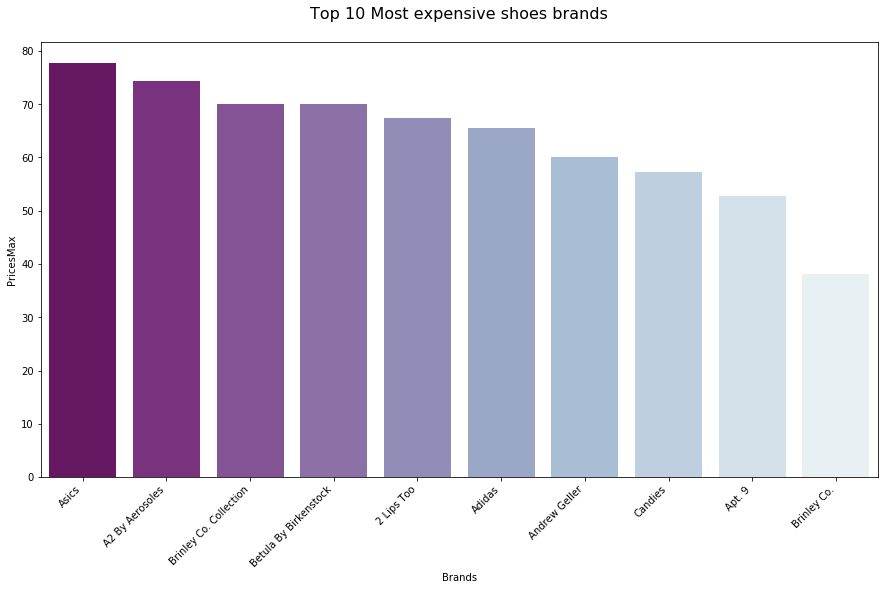

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,8))
barchart=sns.barplot(data=Result.sort_values(by='PricesMax',ascending=False),x='Brands',y='PricesMax',palette='BuPu_r')
plt.xticks(rotation=45,horizontalalignment='right')
plt.title(title+'\n',fontsize=16)
plt.show();